In [59]:
from numpy import cumsum, log, polyfit, sqrt, std, subtract, var
from numpy.random import randn
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from statsmodels.tsa.stattools import adfuller
from datetime import datetime
import pandas as pd
from sysdata.sim.csv_futures_sim_data import csvFuturesSimData
from paper.systems.simplesystem import simplesystem
from ctse.systems.ct_system import ct_system
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mdi import snr
from syscore.fileutils import get_filename_for_package

system = ct_system()
rawdata = system.rawdata
data = system.data

inss = [ins for ins in system.get_instrument_list()]
prices = {ins: data.daily_prices(ins).dropna().rename(ins) for ins in inss}

benchmark_data =  csvFuturesSimData()
benchmark_system = simplesystem(
    benchmark_data,
    'paper.systems.global.yaml')

2022-12-06 15:52:26 {'type': 'csvFuturesSimData'} [Warning] No key for csvFxPricesData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-12-06 15:52:26 {'type': 'csvFuturesSimData'} [Warning] No key for csvRollParametersData in csv_data_paths, will use defaults (may break in production, should be fine in sim)
2022-12-06 15:52:26 {'type': 'base_system', 'stage': 'config'}  Adding config defaults
2022-12-06 15:52:27 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-12-06 15:52:27 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-12-06 15:52:27 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided for .csv, will use defaults  (may break in production, should be fine in sim)
2022-12-06 15:52:27 {'type': 'csvFuturesSimData'} [Warning] No datapaths provided

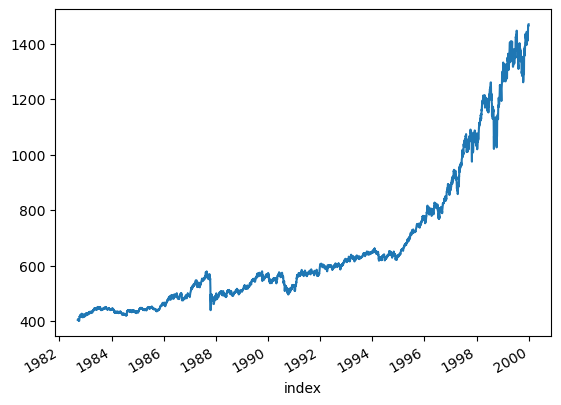

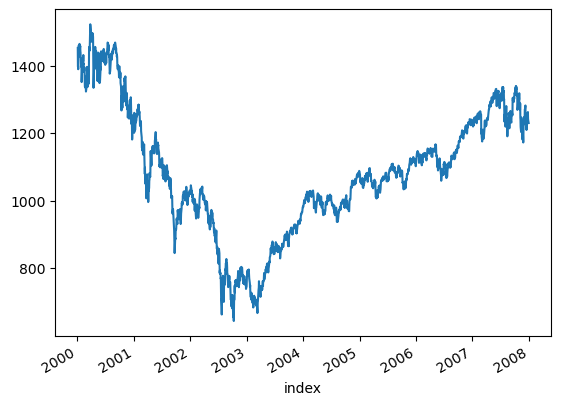

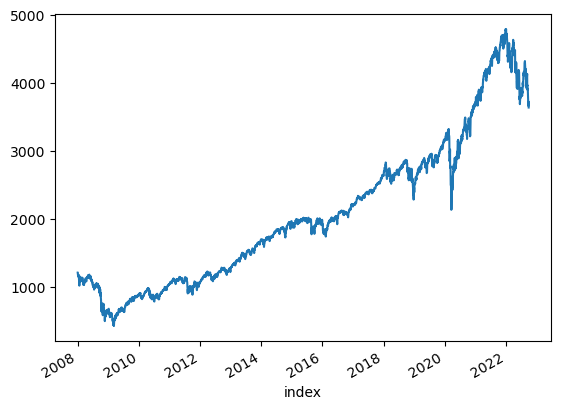

In [64]:
# benchmark_ins = 'SN'
# benchmark_price = system.data.daily_prices(benchmark_ins).dropna()

benchmark_ins = 'SP500'
benchmark_price = benchmark_system.data.daily_prices(benchmark_ins).dropna()
benchmark_period = [('1900-01-01', '2000-01-01'), ('2000-01-01', '2008-01-01'), ('2008-01-01', '2025-01-01')]

# benchmark_ins = 'CHF'
# benchmark_price = benchmark_system.data.daily_prices(benchmark_ins).dropna()

# benchmark_ins = 'BITCOIN'
# benchmark_price = benchmark_system.data.daily_prices(benchmark_ins).dropna()

benchmark_period_price = [benchmark_price[(benchmark_price.index >= period[0]) & (benchmark_price.index < period[1])] for period in benchmark_period]
log_benchmark_period_price = [log(tmp.values) for tmp in benchmark_period_price]
for tmp in benchmark_period_price:
    tmp.plot()
    plt.show()

#Creating a Gometric Brownian Motion, Mean-Reverting and Trending Series
# gbm = log(cumsum(randn(100000))+1000)
# mr = log(randn(100000)+1000)
# tr = log(cumsum(randn(100000)+1)+1000)

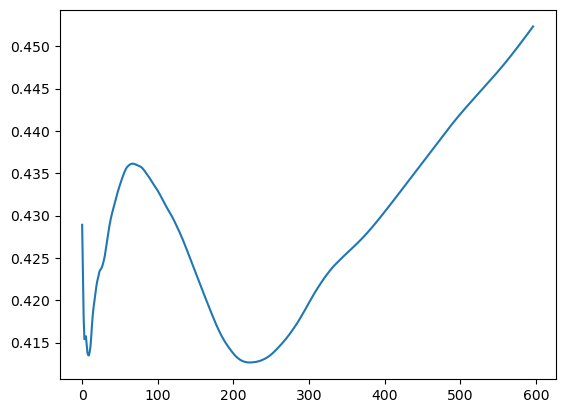

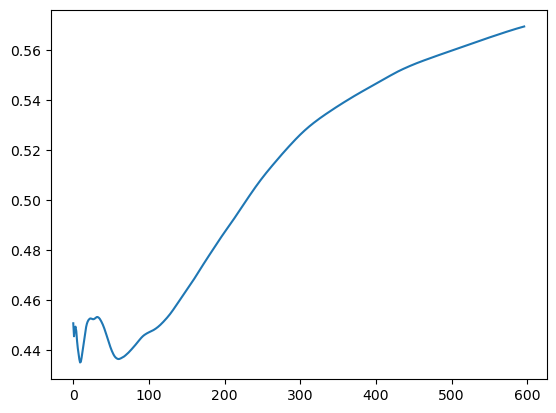

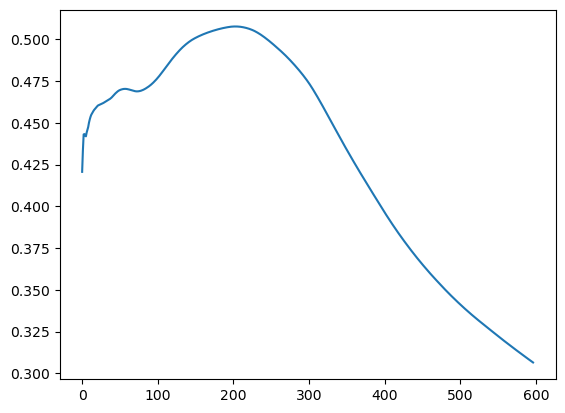

In [65]:
def hurst_exponent(price, min_lag=2, max_lag=100):
  lags = np.arange(min_lag, max_lag + 1)
  tau = [np.std(np.subtract(price[lag:], price[:-lag])) 
    for lag in lags]
  m = np.polyfit(np.log10(lags), np.log10(tau), 1)
  return m, lags, tau

def plotHurst(m, x, y, series, name):
  fig, ax = plt.subplots(1, 2, figsize=(15, 6))
  ax[0].plot(np.log10(x), m[0] * np.log10(x) + m[1])
  ax[0].scatter(np.log10(x), np.log10(y))
  ax[0].set_title(f"{name} (H = {m[0]:.3f})")
  ax[0].set_xlabel(r"log($\tau$)")
  ax[0].set_ylabel(r"log($\sigma_\tau$)")

  ax[1].plot(series)
  ax[1].set_title(f"{name}")
  ax[1].set_ylabel("Price ($)")
  ax[1].set_xlabel("Date")

  return fig, ax



# plotHurst(*hurst_exponent(gbm), gbm, "GBM")
# # plotHurst(*hurst_exponent(mr), mr, "MR")
# # plotHurst(*hurst_exponent(tr), tr, "TR")
# plotHurst(*hurst_exponent(log_benchmark_price), benchmark_price, "benchmark_price")
# plt.show()

for log_benchmark_price in log_benchmark_period_price:
  rs = []
  for ml in range(3, 600):
    rs.append(hurst_exponent(log_benchmark_price, max_lag=ml)[0][0])
  pd.Series(rs).plot()
  plt.show()

In [ ]:
vals = {c: hurst(prices[c].values) for c in prices.keys()}

def plotHurst(m, x, y, series, name):
    return m[0]
#     fig, ax = plt.subplots(1, 2, figsize=(15, 6))
#     ax[0].plot(np.log10(x), m[0] * np.log10(x) + m[1]) 
#     ax[0].scatter(np.log10(x), np.log10(y))
#     ax[0].set_title(f"{name} (H = {m[0]:.3f})")
#     ax[0].set_xlabel(r"log($\tau$)")
#     ax[0].set_ylabel(r"log($\sigma_\tau$)")
    
#     ax[1].plot(series)
#     ax[1].set_title(f"{name}")
#     ax[1].set_ylabel("Price ($)")
#     ax[1].set_xlabel("Date")
    
#     return fig, ax

pd.DataFrame({k:[plotHurst(*v, prices[k], k)] for k, v in vals.items()}).T.sort_values(0)

/var/folders/4h/vzvj91h930v6vjrf1_4jwcnh0000gn/T/ipykernel_80058/547120278.py:6: RuntimeWarning: invalid value encountered in log
  ts = np.log(ts)


,0
SA,0.370610
EG,0.423776
AG,0.428308
AU,0.446220
SR,0.455244
FU,0.455433
MA,0.458002
L,0.460581
BU,0.461566
CU,0.476651
